In [73]:
titanic_df = pd.read_csv("datas/train.csv")
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


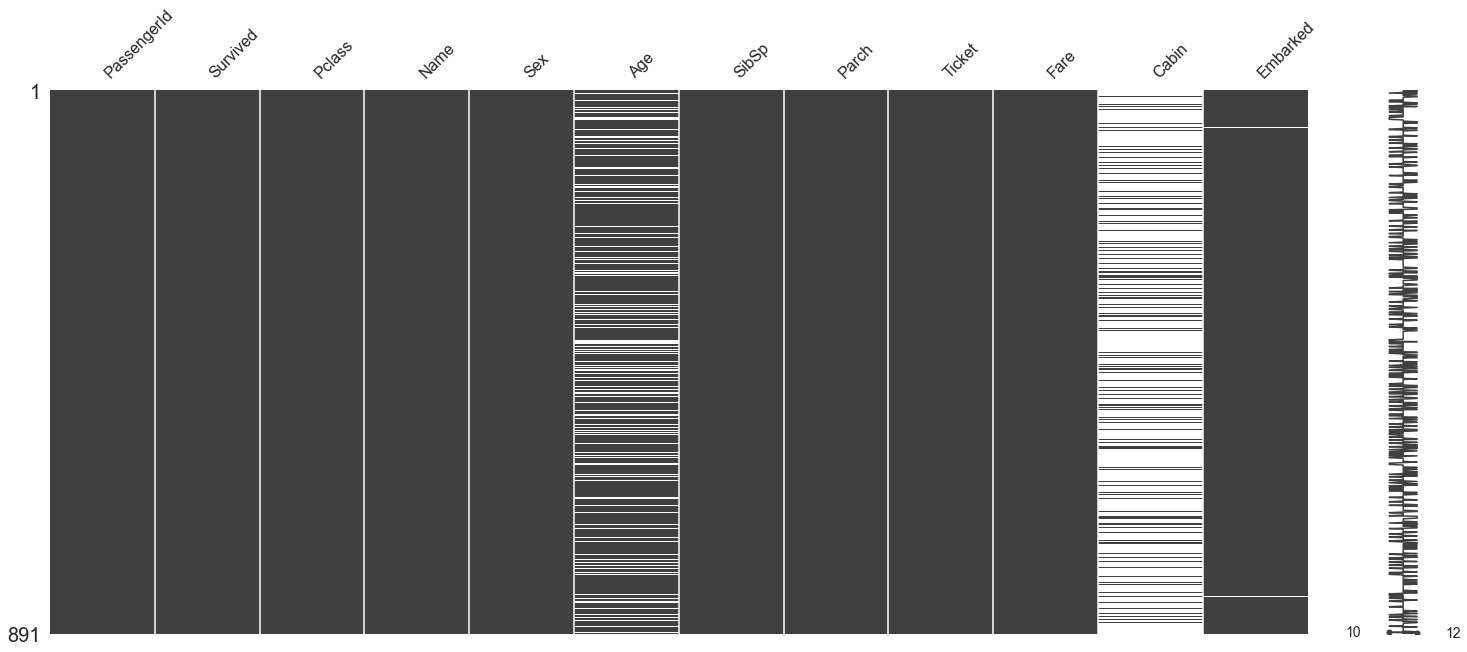

In [74]:
msno.matrix(titanic_df)

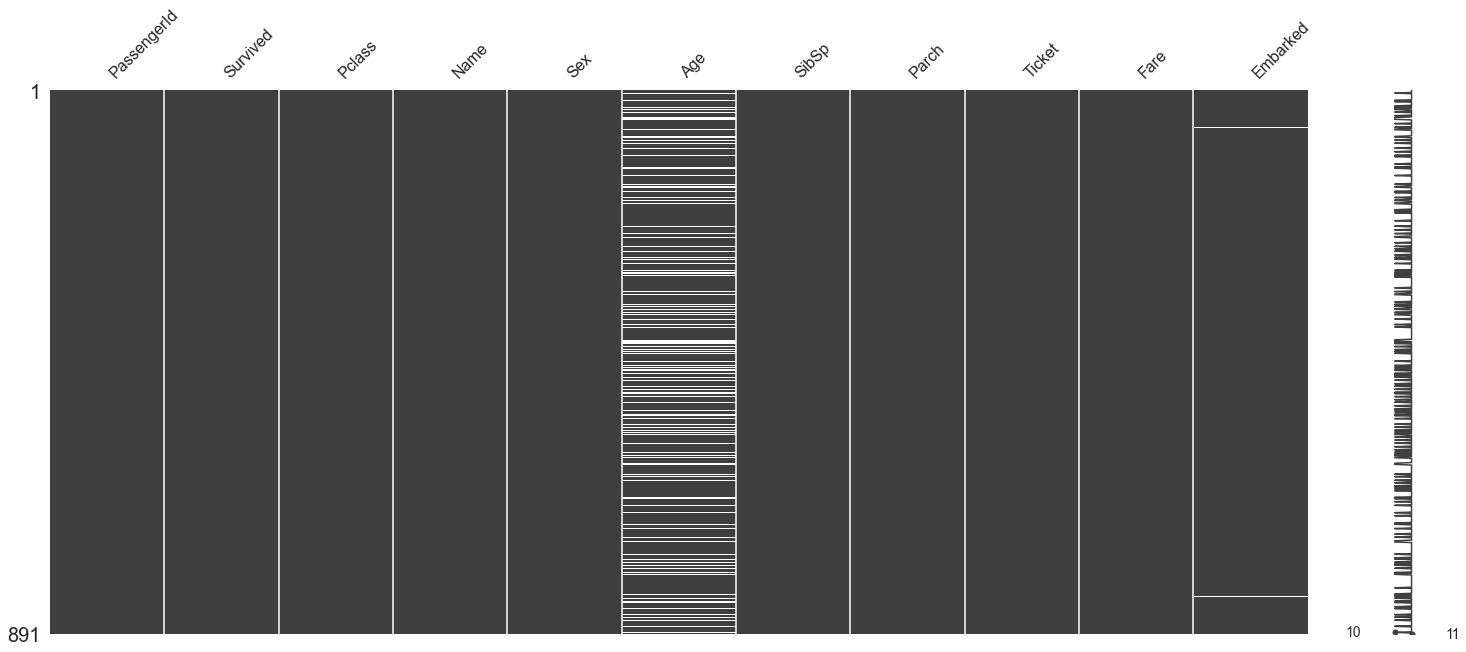

In [76]:
result_df = titanic_df.dropna(thresh=int(len(titanic_df)*0.8), axis=1)
msno.matrix(result_df)

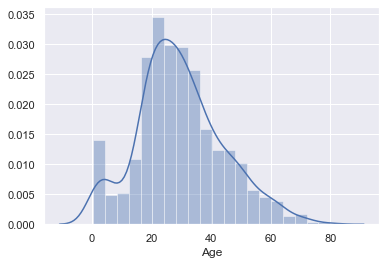

In [77]:
sns.distplot(result_df["Age"])

In [81]:
notnull_age = result_df[result_df["Age"].notnull()]["Age"]

In [82]:
median_age = np.median(notnull_age)
median_age

28.0

In [85]:
result_df["Age"][result_df["Age"].isnull()] = median_age

<ipython-input-85-616729266345>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df["Age"][result_df["Age"].isnull()] = median_age
C:\Users\dnfrk\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


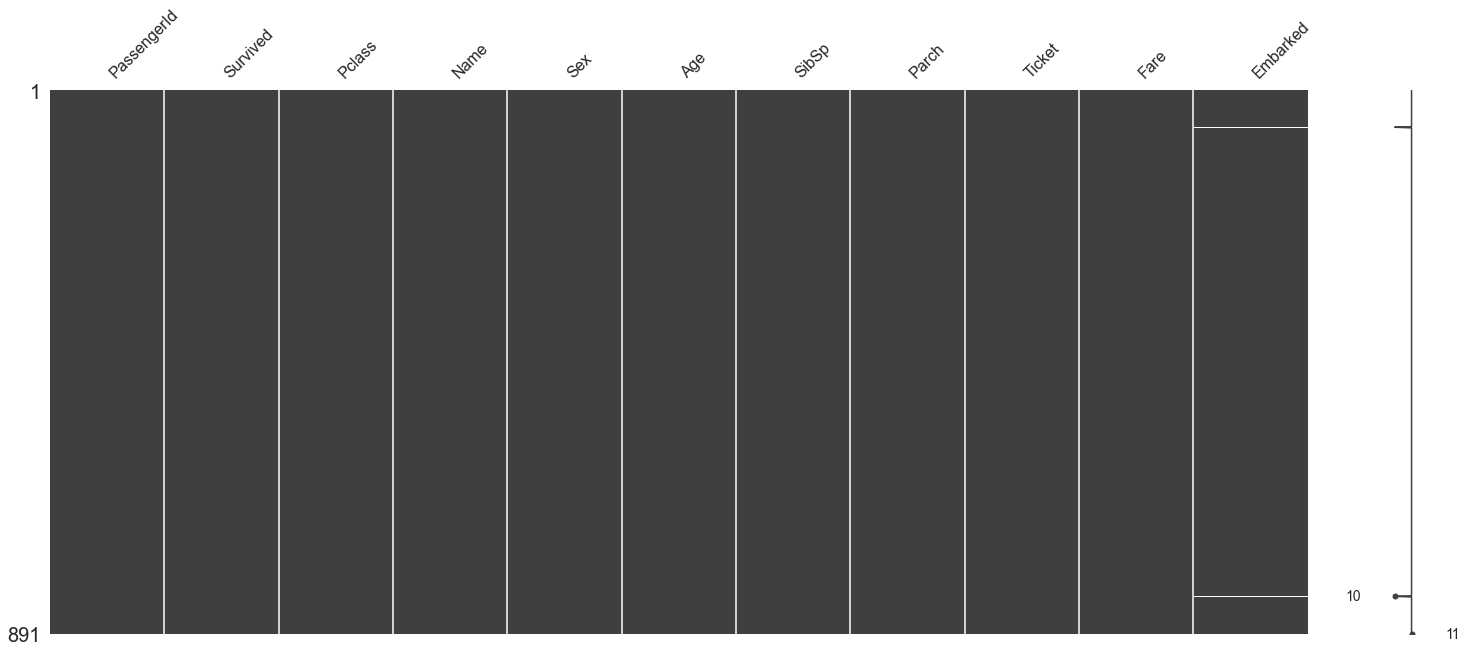

In [86]:
msno.matrix(result_df)

In [91]:
data = result_df["Embarked"]

In [94]:
data.iloc[np.argmax(data.value_counts())]

'S'

In [97]:
result_df["Embarked"][result_df["Embarked"].isnull()] = data.iloc[np.argmax(data.value_counts())]

<ipython-input-97-a9c2f554ffde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df["Embarked"][result_df["Embarked"].isnull()] = data.iloc[np.argmax(data.value_counts())]
C:\Users\dnfrk\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


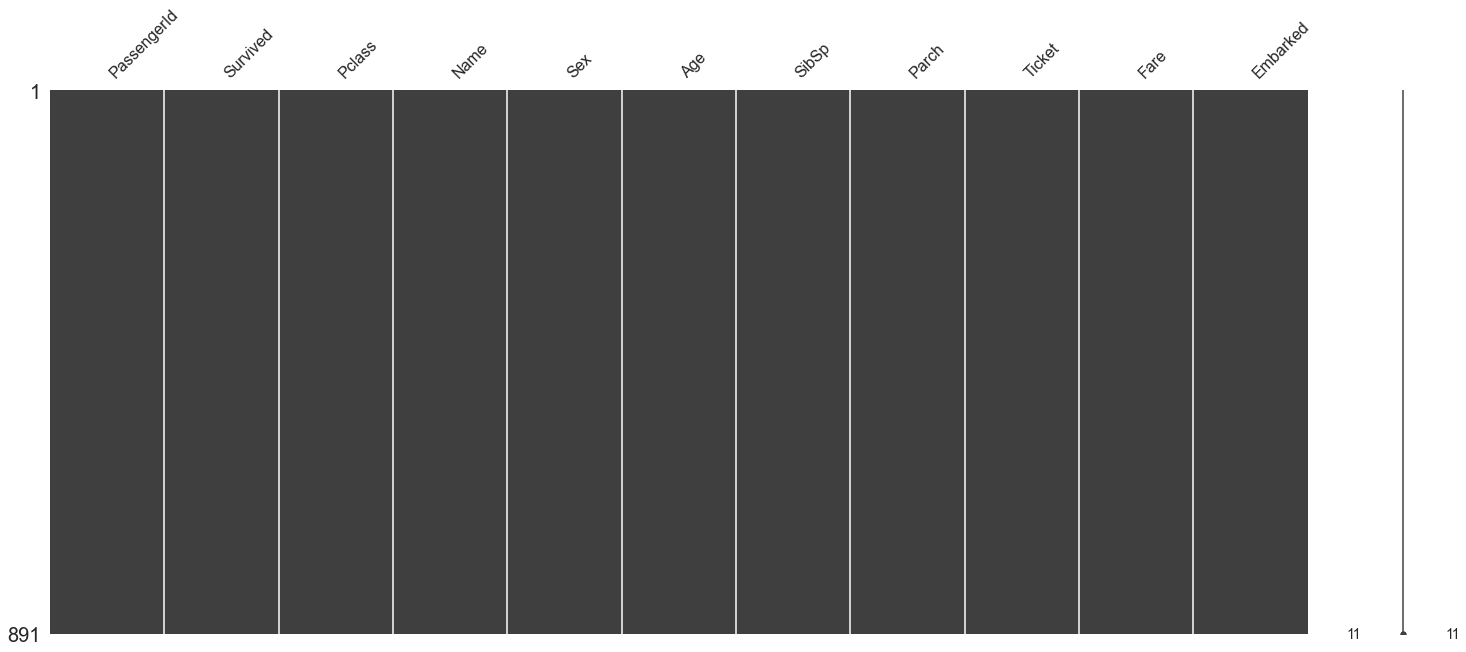

In [98]:
msno.matrix(result_df)

In [120]:
df_1 = result_df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]]
df_1.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
886,2,male,27.0,0,0,13.00,S,0
887,1,female,19.0,0,0,30.00,S,1
888,3,female,28.0,1,2,23.45,S,0
889,1,male,26.0,0,0,30.00,C,1
890,3,male,32.0,0,0,7.75,Q,0


In [121]:
oh_sex = pd.get_dummies(df_1["Sex"])
oh_embarked = pd.get_dummies(df_1["Embarked"])

In [122]:
df_1 = pd.concat([df_1, oh_sex, oh_embarked], axis=1)
df_1.drop(columns=["Sex","Embarked"], inplace=True)

In [126]:
df_1 = df_1[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male',
       'C', 'Q', 'S', 'Survived']]

In [127]:
df_1

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Survived
0,3,22.0,1,0,7.2500,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1
4,3,35.0,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1,0
887,1,19.0,0,0,30.0000,1,0,0,0,1,1
888,3,28.0,1,2,23.4500,1,0,0,0,1,0
889,1,26.0,0,0,30.0000,0,1,1,0,0,1


In [128]:
from sklearn.model_selection import train_test_split

In [130]:
df_x = df_1.drop(columns=["Survived"])
df_y = df_1["Survived"]

In [133]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [134]:
len(train_x), len(test_x)

(712, 179)

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
model = DecisionTreeClassifier().fit(train_x, train_y)

In [137]:
pred_y = model.predict(test_x)

In [138]:
pred_y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [140]:
model.score(test_x, test_y)

0.776536312849162

In [142]:
test_x[:4]

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
862,1,48.0,0,0,25.9292,1,0,0,0,1
223,3,28.0,0,0,7.8958,0,1,0,0,1
84,2,17.0,0,0,10.5000,1,0,0,0,1
680,3,28.0,0,0,8.1375,1,0,0,1,0


In [143]:
model.predict(test_x[:4])

array([1, 0, 1, 1], dtype=int64)